# Glasses Detection Project

This notebook trains a Convolutional Neural Network (CNN) to classify images into two categories:
- Wearing Glasses
- Not Wearing Glasses

Images are resized to 150x150 pixels and normalized before training.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

## Dataset Path & Structure

In [3]:
dataset_path = "dataset"

# Check folder structure & count images
for category in ['glasses', 'no_glasses']:
    folder = os.path.join(dataset_path, category)
    num_images = len(os.listdir(folder))
    print(f"Category '{category}' has {num_images} images.")


Category 'glasses' has 2769 images.
Category 'no_glasses' has 2151 images.


## Prepare Image Data Generators

Using `ImageDataGenerator` for rescaling images and splitting dataset into training and validation sets (80% train, 20% validation).


In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 3937 images belonging to 2 classes.
Found 983 images belonging to 2 classes.


## Build CNN Model

The model consists of two convolutional layers with max pooling, followed by fully connected layers.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

Train for 10 epochs and validate on validation set.


In [6]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.6850 - loss: 0.7866 - val_accuracy: 0.9969 - val_loss: 0.0190
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 215ms/step - accuracy: 0.9947 - loss: 0.0208 - val_accuracy: 0.9980 - val_loss: 0.0188
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 220ms/step - accuracy: 0.9958 - loss: 0.0150 - val_accuracy: 0.9990 - val_loss: 0.0060
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.9969 - val_loss: 0.0092
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 221ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.9990 - val_loss: 0.0084
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9980 - val_loss: 0.0095
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 215ms/step - accuracy: 0.9980 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 3.1529e-04
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 1.0000 - los

## Plot Training & Validation Accuracy


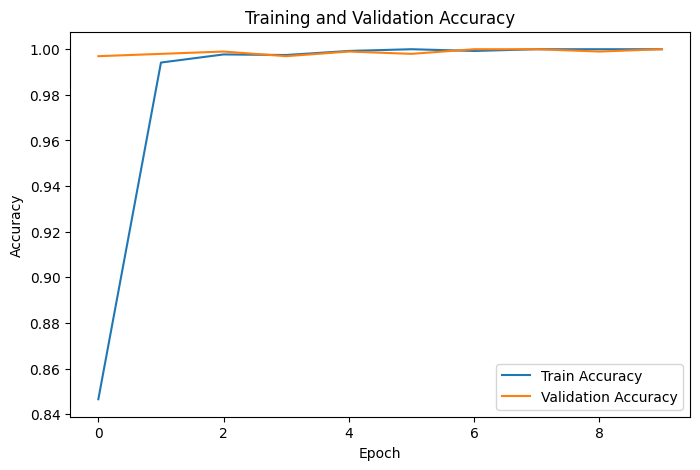

In [7]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Plot Training & Validation Loss


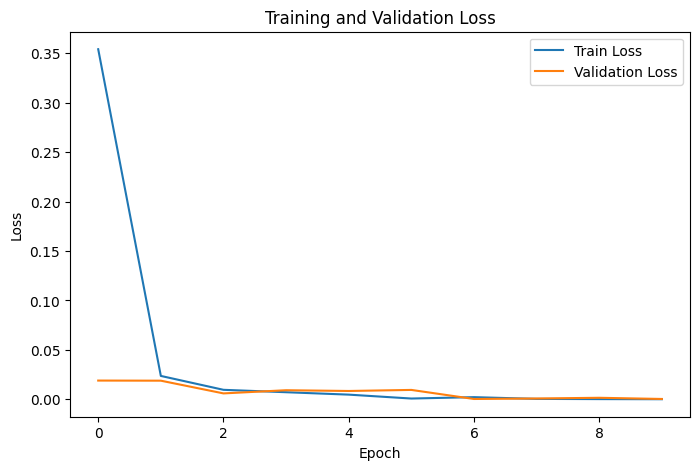

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Test the Model on New Images

Load and preprocess a new image, then predict if the person is wearing glasses or not.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


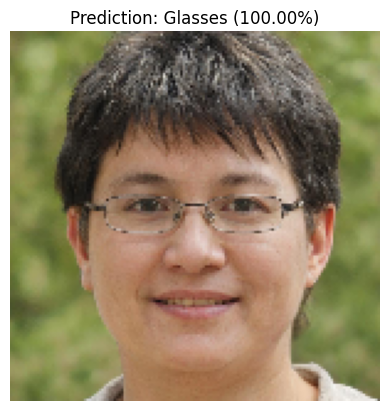

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def load_and_prepare_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

def predict_glasses(img_path):
    img, prepared_img = load_and_prepare_image(img_path)
    prediction = model.predict(prepared_img)[0][0]
    
    # Since class 1 = no_glasses, and sigmoid outputs probability of class 1:
    if prediction > 0.5:
        label = "No Glasses"
        confidence = prediction
    else:
        label = "Glasses"
        confidence = 1 - prediction
    
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()


# Example usage: replace with path to your test image
test_image_path = "dataset/glasses/face-135.jpg"  # or any image path you want to test
predict_glasses(test_image_path)
